# Project title: Price model for airbnb listings in Geneva

## Exploratory Data Analysis (EDA)

### Libraries and settings

In [70]:
# Libraries
import os
import json
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/project_arm_airbnb/data


### Import csv file 'listings_with_distances'

In [71]:
# Import data from csv file 'listings_with_distances.csv'
df_orig = pd.read_csv('listings_with_distances.csv')
print(df_orig.shape)
df_orig.head()

(2024, 20)


,id,neighbourhood_cleansed,lat,lon,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,lake_access,num_amenities,dist_ta,dist_pb,num_ta,num_stops
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,0,1,0,22,409.552941,120.893645,4,3
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,0,1,0,51,375.547668,465.095061,1,0
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,0,1,0,26,564.152315,460.109880,0,0
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,1,1,1,48,6694.037169,162.973109,0,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,0,1,1,26,795.419536,127.984620,0,2


## Univariate EDA

### Summary statistics

In [72]:
# summary statistics of numeric variables
df_orig.describe()

,id,lat,lon,price,accommodates,bathrooms,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,lake_access,num_amenities,dist_ta,dist_pb,num_ta,num_stops
count,2.024000e+03,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000
mean,2.992165e+07,46.206284,6.143972,126.394269,2.657115,1.201334,4.615577,4.782021,0.348814,10.613636,0.161067,21.853755,1073.613012,657.237024,1.076087,1.137846
std,1.529775e+07,0.020470,0.027914,134.113890,1.507280,0.497997,0.646705,0.379010,0.476713,25.314198,0.367684,10.491310,1271.383805,1034.649079,2.184550,1.751285
min,4.251500e+04,46.138820,5.973220,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,8.585986,14.723122,0.000000,0.000000
25%,1.723789e+07,46.195377,6.132483,70.000000,2.000000,1.000000,4.615577,4.782021,0.000000,1.000000,0.000000,14.000000,394.674935,191.111468,0.000000,0.000000
50%,3.307640e+07,46.204440,6.144230,99.000000,2.000000,1.000000,4.670000,4.782021,0.000000,1.000000,0.000000,20.000000,711.366700,343.589753,0.000000,0.000000
75%,4.306113e+07,46.212587,6.155158,134.000000,4.000000,1.000000,4.940000,5.000000,1.000000,3.000000,0.000000,28.000000,1163.921594,623.117686,1.000000,2.000000
max,5.069686e+07,46.346590,6.269240,3000.000000,11.000000,6.000000,5.000000,5.000000,1.000000,102.000000,1.000000,71.000000,9560.756727,9077.884655,12.000000,10.000000


### Statistical measures (min, max, std, mean, median, count) for price and accomodates

In [73]:
# Price
print('Price:',
      'Count:', round(df_orig.price.count(), 1),
      'Min:', round(df_orig.price.min(), 1),
      'Max:', round(df_orig.price.max(), 1),
      'Mean:', round(df_orig.price.mean(), 1),
      'Median:', round(df_orig.price.median(), 1),
      'Std:', round(df_orig.price.std(), 1))

# Accommodates
print('Accomodates:',
      'Count:', round(df_orig.accommodates.count(), 1),
      'Min:', round(df_orig.accommodates.min(), 1),
      'Max:', round(df_orig.accommodates.max(), 1),
      'Mean:', round(df_orig.accommodates.mean(), 1),
      'Median:', round(df_orig.accommodates.median(), 1),
      'Std:', round(df_orig.accommodates.std(), 1))

Price: Count: 2024 Min: 10.0 Max: 3000.0 Mean: 126.4 Median: 99.0 Std: 134.1
Accomodates: Count: 2024 Min: 1 Max: 11 Mean: 2.7 Median: 2.0 Std: 1.5


### Skewness

In [74]:
df_orig[['price','accommodates']].skew()

price           9.520778
accommodates    1.654079
dtype: float64

### Kurtosis

In [75]:
df_orig[['price','accommodates']].kurtosis()

price           152.575145
accommodates      3.776247
dtype: float64

### Create subset for further analysis based on research question

In [76]:
# create a subset of the data with prices between 20 and 200
df_sub = df_orig[(df_orig['price'] >= 20) & (df_orig['price'] <= 200)]

# create a subset of the data only with listings with room type Entire home/apt
df = df_sub[df_sub['room_type'] == 'Entire home/apt']
df.head()

,id,neighbourhood_cleansed,lat,lon,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,lake_access,num_amenities,dist_ta,dist_pb,num_ta,num_stops
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,0,1,0,26,564.152315,460.109880,0,0
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,1,1,1,48,6694.037169,162.973109,0,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,0,1,1,26,795.419536,127.984620,0,2
5,338682,Commune de Genève,46.20682,6.15526,Entire apartment,Entire home/apt,157.0,2,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.80,4.85,1,1,0,26,93.465704,626.811213,3,0
9,468995,Commune de Genève,46.20508,6.15822,Entire apartment,Entire home/apt,107.0,1,1.0,"[""Extra pillows and blankets"", ""Dishes and sil...",4.74,4.78,0,1,1,28,362.871159,493.705269,3,0


In [77]:
# show type of each column
df.dtypes

id                                  int64
neighbourhood_cleansed             object
lat                               float64
lon                               float64
property_type                      object
room_type                          object
price                             float64
accommodates                        int64
bathrooms                         float64
amenities                          object
review_scores_rating              float64
review_scores_location            float64
instant_bookable                    int64
calculated_host_listings_count      int64
lake_access                         int64
num_amenities                       int64
dist_ta                           float64
dist_pb                           float64
num_ta                              int64
num_stops                           int64
dtype: object

In [78]:
# Skewness
df[['price','accommodates']].skew()


price           0.665070
accommodates    1.410352
dtype: float64

In [79]:
# Kurtosis
df[['price','accommodates']].kurtosis()

price           0.065862
accommodates    2.921181
dtype: float64

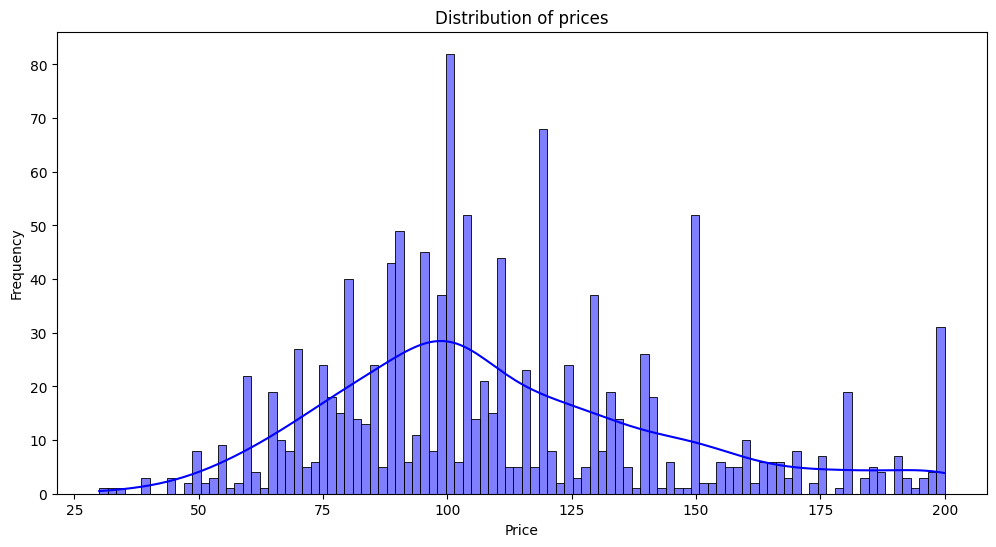

In [80]:
# plot the distribution of the price column
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=100, color='blue', kde=True)
plt.title('Distribution of prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

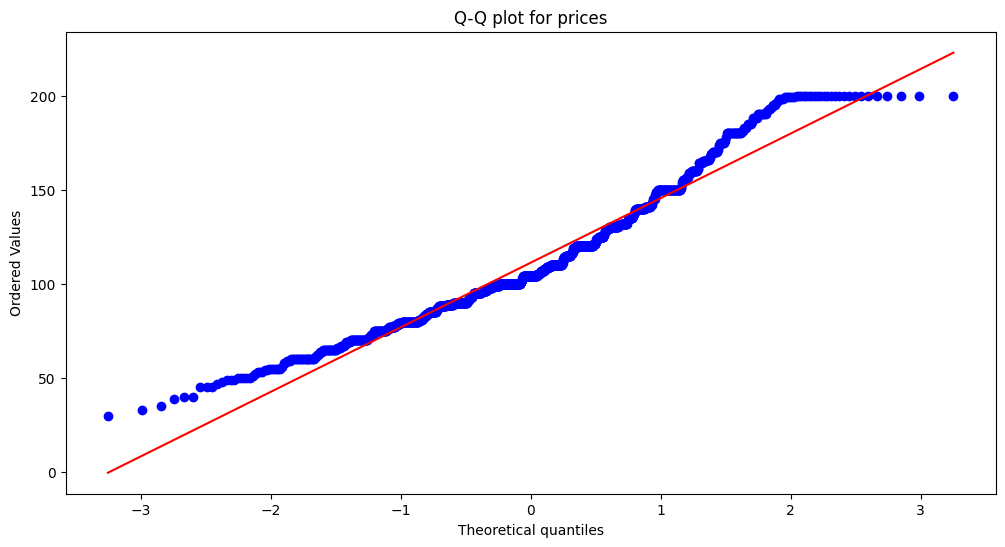

In [81]:
# create quantile-quantile plot for the price column
plt.figure(figsize=(12, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('Q-Q plot for prices')
plt.show()

### Neighborhood

In [82]:
# print the number of listings in each neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)

neighbourhood_cleansed
Commune de Genève     907
Carouge                68
Thônex                 23
Lancy                  23
Chêne-Bougeries        17
Versoix                17
Meyrin                 15
Vernier                15
Pregny-Chambésy        15
Grand-Saconnex         13
Chêne-Bourg            11
Cologny                11
Veyrier                10
Plan-les-Ouates         8
Onex                    7
Bardonnex               5
Bellevue                5
Collonge-Bellerive      5
Meinier                 4
Puplinge                4
Corsier                 3
Bernex                  3
Confignon               3
Troinex                 3
Dardagny                2
Genthod                 2
Hermance                2
Collex-Bossy            2
Soral                   2
Vandoeuvres             1
Satigny                 1
Perly-Certoux           1
Russin                  1
Choulex                 1
Presinge                1
Céligny                 1
Name: count, dtype: int64


In [83]:
# list the 5 most common neighborhoods and summarize the others as 'Other'
top_5_neighborhoods = neighborhood_counts.head(5).index
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].apply(lambda x: x if x in top_5_neighborhoods else 'Other')
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)

neighbourhood_cleansed
Commune de Genève    907
Other                174
Carouge               68
Lancy                 23
Thônex                23
Chêne-Bougeries       17
Name: count, dtype: int64


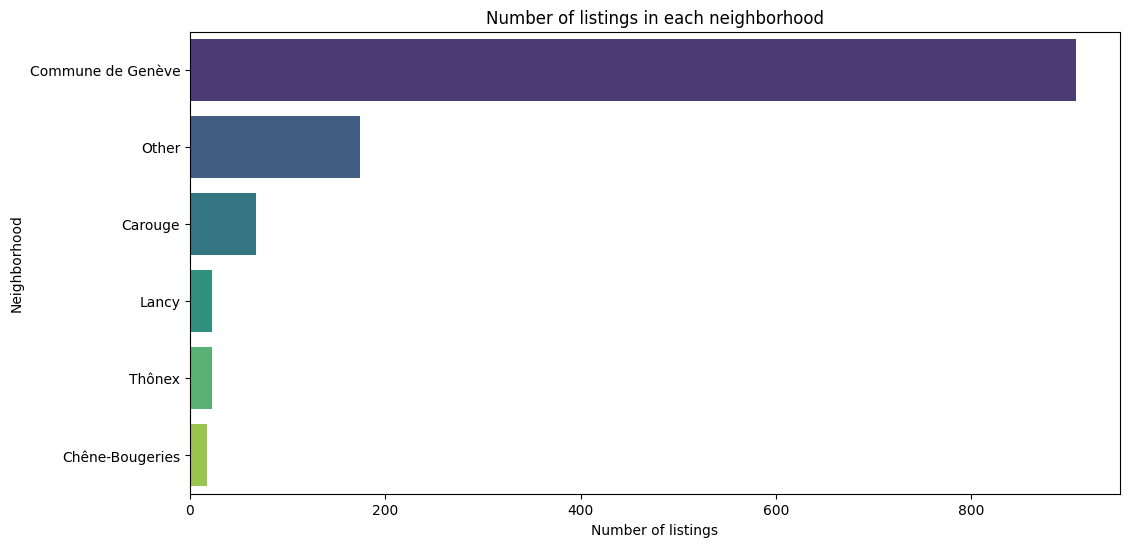

In [84]:
# plot the numnber of the neighbourhood_cleansed column and sort by the number of listings, create a category 'Others' that sums up the listings of neighbourhoods with less than 50 listings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='neighbourhood_cleansed', order=neighborhood_counts.index, palette='viridis')
plt.title('Number of listings in each neighborhood')
plt.xlabel('Number of listings')
plt.ylabel('Neighborhood')
plt.show()

### Property types

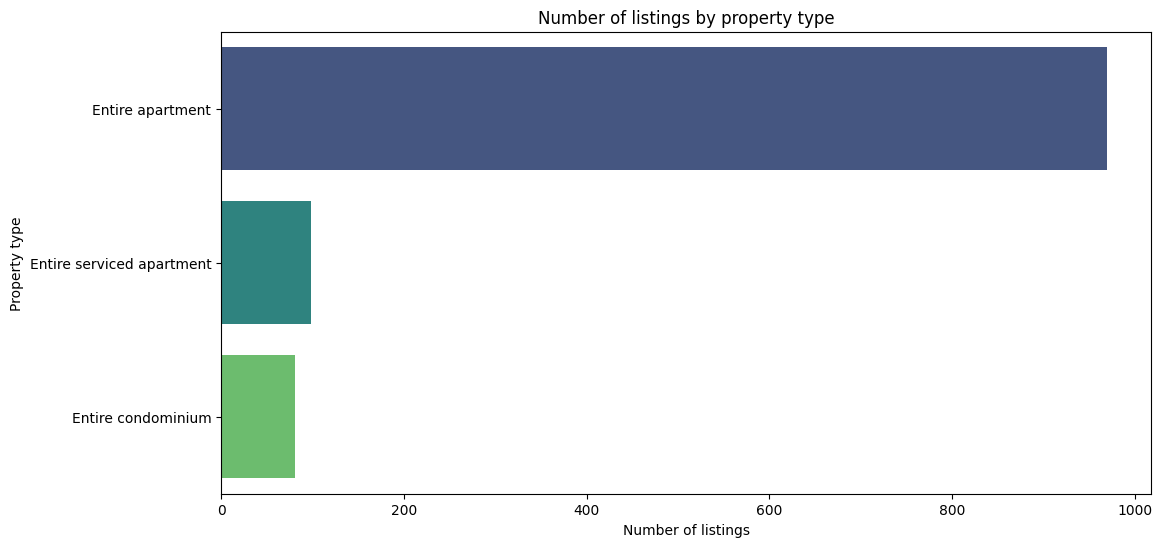

In [85]:
# plot the number of listings depending on the property type and only include property types with more than 25 listings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='property_type', order=df['property_type'].value_counts()[df['property_type'].value_counts() > 25].index, palette='viridis')
plt.title('Number of listings by property type')
plt.xlabel('Number of listings')
plt.ylabel('Property type')
plt.show()

### Histogram of 'accomodates'

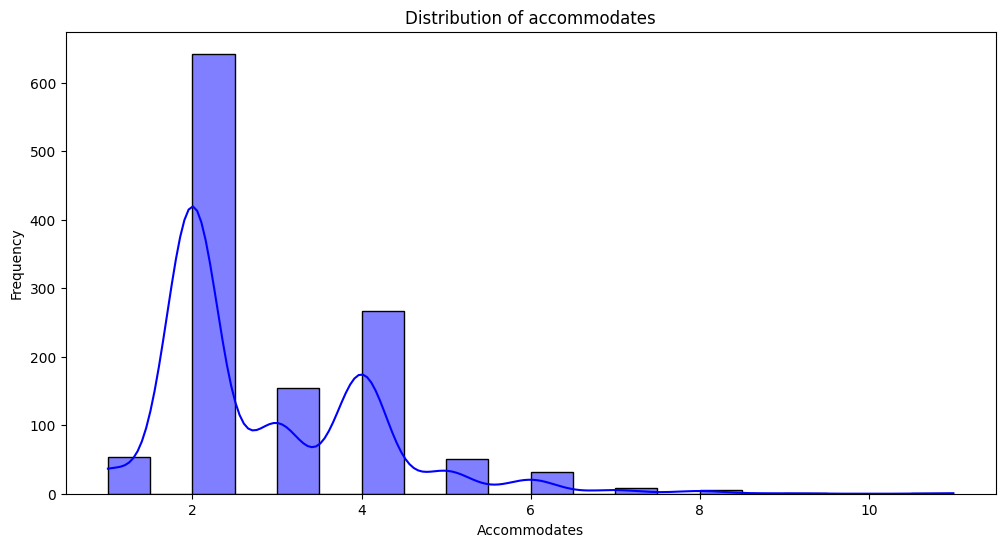

In [86]:
# create a histogram of the number of people that can be accommodated in the listings
plt.figure(figsize=(12, 6))
sns.histplot(df['accommodates'], bins=20, color='blue', kde=True)
plt.title('Distribution of accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.show()

## Multivariate EDA

### Pivot tables

In [87]:
# Using pivot_table to reshape the data and calculate means
pivot_table = df.pivot_table(index='neighbourhood_cleansed', columns='room_type', values='price', aggfunc=np.mean)


In [88]:
pd.pivot_table(df[['neighbourhood_cleansed', 'price', 'accommodates', 'review_scores_rating', 'instant_bookable', 'num_amenities', 'lake_access']],
               index=['neighbourhood_cleansed'],
               values=['price', 'review_scores_rating', 'accommodates', 'num_amenities', 'lake_access', 'instant_bookable'],
               aggfunc=(np.mean, 'count'))

accommodates           instant_bookable            \
                              count      mean            count      mean   
neighbourhood_cleansed                                                     
Carouge                          68  2.308824               68  0.441176   
Chêne-Bougeries                  17  3.176471               17  0.058824   
Commune de Genève               907  2.715546              907  0.388093   
Lancy                            23  3.565217               23  0.391304   
Other                           174  3.321839              174  0.281609   
Thônex                           23  3.869565               23  0.521739   

                       lake_access           num_amenities            price  \
                             count      mean         count       mean count   
neighbourhood_cleansed                                                        
Carouge                         68  0.029412            68  20.705882    68   
Chêne-Bougeries                 17  0.058824            17  20.764706    17   
Commune de Genève              907  0.202867           907  21.699008   907   
Lancy                           23  0.043478            23  21.173913    23   
Other                          174  0.051724           174  22.959770   174   
Thônex                          23  0.043478            23  25.826087    23   

                                   review_scores_rating            
                              mean                count      mean  
neighbourhood_cleansed                                             
Carouge                 104.235294                   68  4.657180  
Chêne-Bougeries         112.470588                   17  4.553009  
Commune de Genève       112.370452                  907  4.625973  
Lancy                   100.739130                   23  4.471789  
Other                   111.936782                  174  4.558071  
Thônex                   90.565217                   23  4.737015

### Correlation matrix

In [91]:
corr = df[['accommodates', 
          'num_amenities', 
          'price', 
          'review_scores_rating',
          'review_scores_location',
          'bathrooms']].cov().corr()
corr

,accommodates,num_amenities,price,review_scores_rating,review_scores_location,bathrooms
accommodates,1.000000,0.144847,0.993292,0.956150,0.968907,0.998119
num_amenities,0.144847,1.000000,0.070199,0.313952,0.146534,0.135299
price,0.993292,0.070199,1.000000,0.952698,0.981092,0.997092
review_scores_rating,0.956150,0.313952,0.952698,1.000000,0.976380,0.960443
review_scores_location,0.968907,0.146534,0.981092,0.976380,1.000000,0.976600
bathrooms,0.998119,0.135299,0.997092,0.960443,0.976600,1.000000


### Covariance Matrix

In [64]:
cov = df[['accommodates', 
          'num_amenities', 
          'price', 
          'review_scores_rating',
          'review_scores_location',
          'bathrooms']].cov()
cov

,accommodates,num_amenities,price,review_scores_rating,review_scores_location,bathrooms
accommodates,1.601624,1.799621,15.475286,0.005606,-0.013997,0.154213
num_amenities,1.799621,95.366154,24.702661,0.630818,0.146408,0.299029
price,15.475286,24.702661,1219.155292,2.026299,0.944181,2.989948
review_scores_rating,0.005606,0.630818,2.026299,0.363525,0.112526,-0.000423
review_scores_location,-0.013997,0.146408,0.944181,0.112526,0.143121,0.002013
bathrooms,0.154213,0.299029,2.989948,-0.000423,0.002013,0.086942


### Scatterplot-matrix (seaborn)

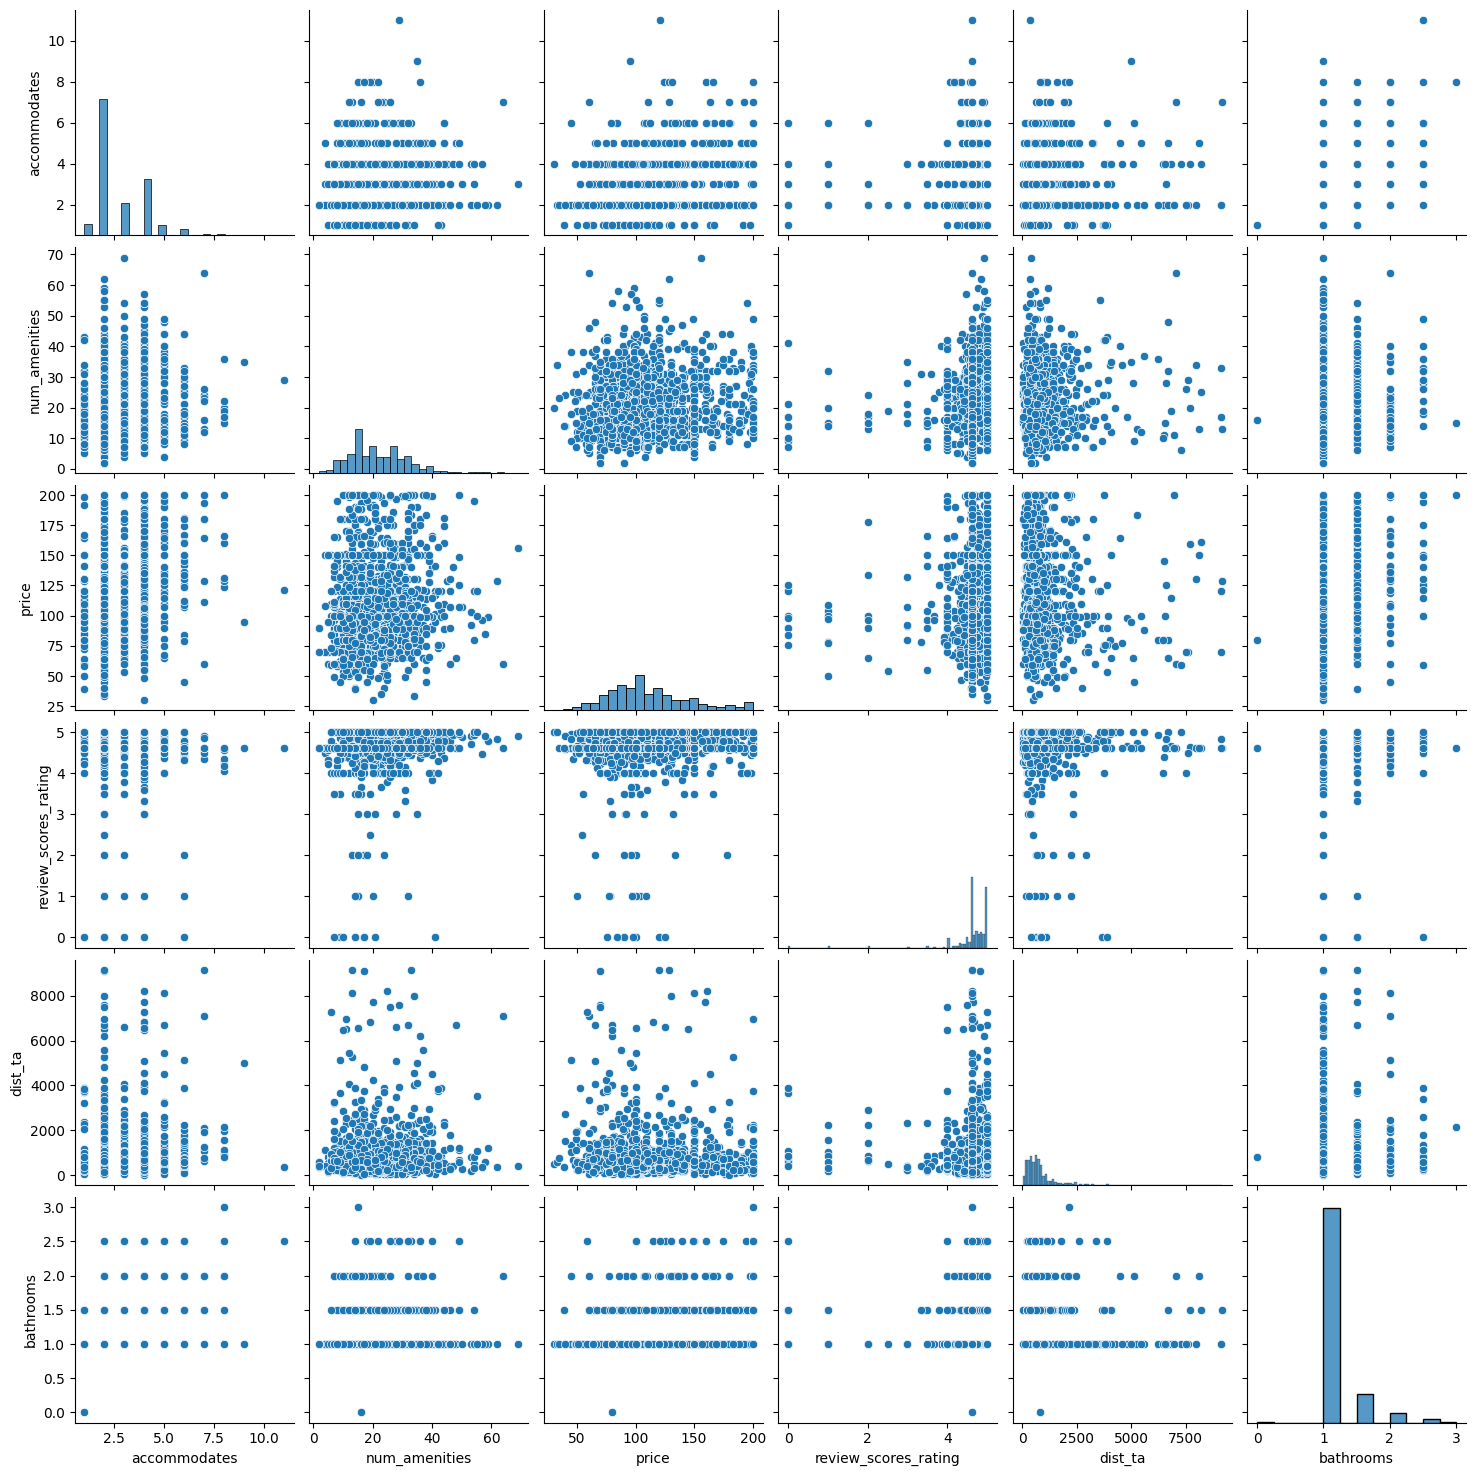

In [ ]:
# scatterplot matrix of variables
sns.pairplot(df[['accommodates', 
                 'num_amenities', 
                 'price', 
                 'review_scores_rating',
                 'dist_ta',
                 'bathrooms']])
plt.show()


### Jupyter notebook --footer info-- 

In [200]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2025-01-08 15:02:20
Python Version: 3.11.10
-----------------------------------
